# Finance Data in Python
- Candlestick chart: Visualizes the price movement (open, high, low, close).
- Load Data
- Preprocess
- Visualization
- Indicators (Moving Averages, RSI, MACD)

## Step 1: Install Required Libraries

In [1]:
!pip install -q yfinance mplfinance pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


## Step 2: Download Stock or Crypto Data

In [28]:
import yfinance as yf

# Download historical data for Bitcoin (BTC-USD)

# with 1-Day interval
# df = yf.download('BTC-USD', start='2023-01-01', end='2024-01-01')

# with 30-minute interval (The requested range must be within the last 60 days)
df = yf.download('BTC-USD', start='2024-08-11', end='2024-08-15', interval='15m')
df.to_csv('BTCUSD.csv')

# Show the first few rows of the dataset
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-08-11 00:00:00,60943.375000,61162.320312,60924.761719,61134.144531,61134.144531,27507712
2024-08-11 00:15:00,61173.027344,61192.378906,61051.562500,61073.898438,61073.898438,18353152
2024-08-11 00:30:00,61061.269531,61172.703125,61044.687500,61114.257812,61114.257812,0
2024-08-11 00:45:00,61107.632812,61143.031250,61086.015625,61092.816406,61092.816406,0
2024-08-11 01:00:00,61102.453125,61122.296875,61050.558594,61122.296875,61122.296875,0


## Step 3: Visualize the Candlestick Chart with Moving Averages

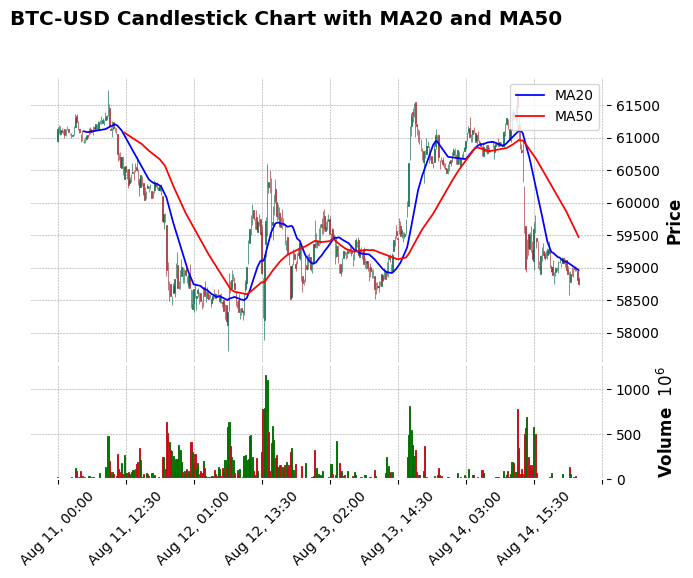

In [29]:
import mplfinance as mpf

# Calculate 20 and 50 day moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Define the moving averages to plot
add_plot = [
    mpf.make_addplot(df['MA20'], color='blue', label='MA20'),
    mpf.make_addplot(df['MA50'], color='red', label='MA50')
]

# Plot candlesticks with moving averages
mpf.plot(df, type='candle', style='charles', addplot=add_plot,
         title='BTC-USD Candlestick Chart with MA20 and MA50',
         volume=True)

## Step 4: Calculate and Plot RSI and MACD

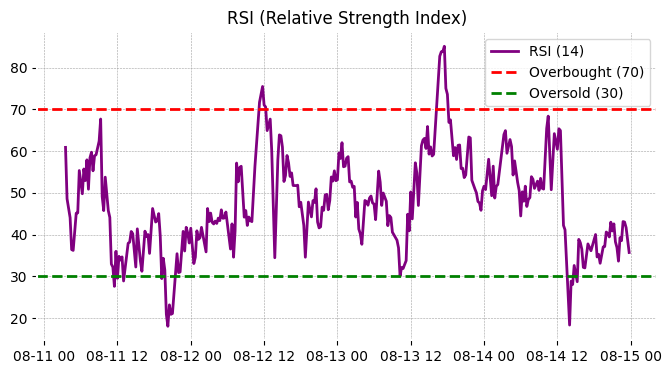

In [35]:
import pandas_ta as ta

# Calculate the RSI with a 14-day period
df['RSI'] = ta.rsi(df['Close'], length=14)

# Plot the RSI
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df.index, df['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI (Relative Strength Index)')
plt.legend()
plt.show()


### Add RSI Below the Candlestick Chart

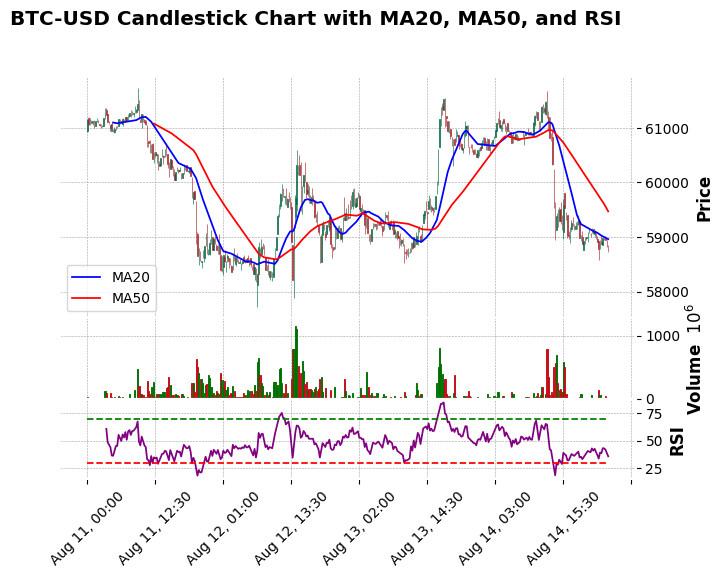

In [36]:
# Create subplots for the Moving Averages and RSI
line30 = [30]*len(df)
line70 = [70]*len(df)

add_plots = [
    mpf.make_addplot(df['MA20'], color='blue', label='MA20'),
    mpf.make_addplot(df['MA50'], color='red', label='MA50'),
    mpf.make_addplot(df['RSI'], panel=2, color='purple', ylabel='RSI'),
    mpf.make_addplot(line30, panel=2, color='r', linestyle='--'),
    mpf.make_addplot(line70, panel=2, color='g', linestyle='--'),
]

# Plot candlesticks with moving averages and RSI below
mpf.plot(df, type='candle', style='charles', addplot=add_plots,
         title='BTC-USD Candlestick Chart with MA20, MA50, and RSI',
         volume=True,
         panel_ratios=(3, 1, 1))  # Main chart 3x the size of the volume and RSI panels

### MACD

In [32]:
# Calculate MACD (with default fast=12, slow=26, signal=9)
macd = ta.macd(df['Close'])
df['MACD'] = macd['MACD_12_26_9']
df['MACD_Signal'] = macd['MACDs_12_26_9']
df['MACD_Hist'] = macd['MACDh_12_26_9']

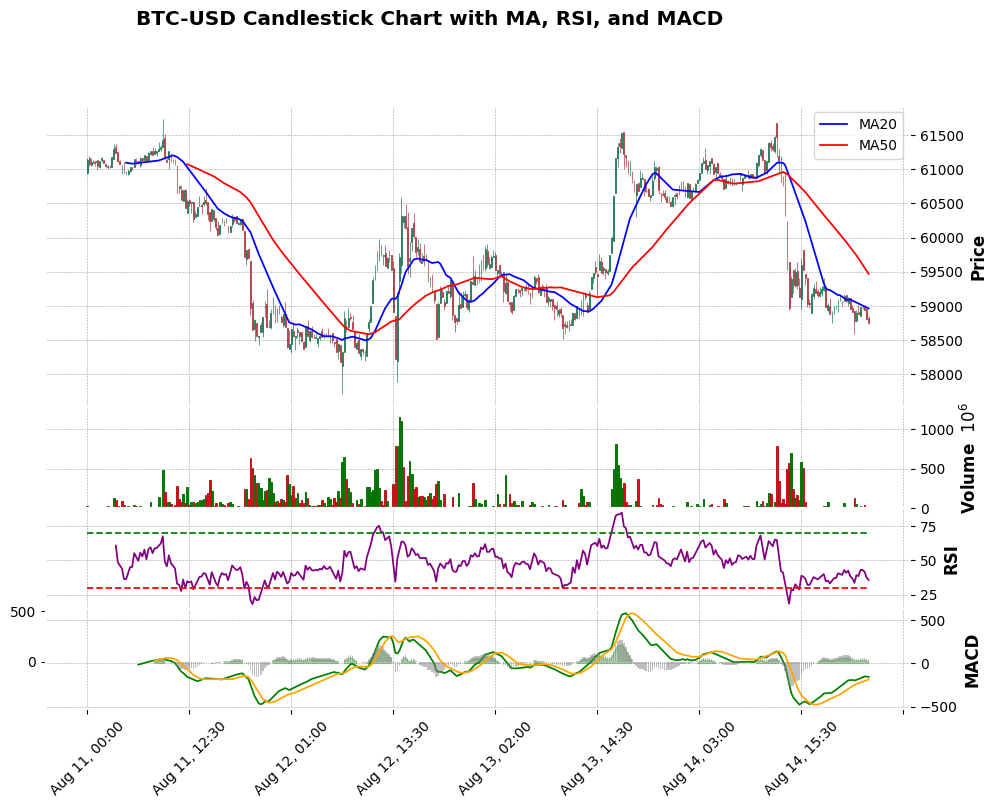

In [33]:
# Create subplots for the Moving Averages, RSI, and MACD
line30 = [30]*len(df)
line70 = [70]*len(df)
add_plots = [
    mpf.make_addplot(df['MA20'], color='blue', label='MA20'),
    mpf.make_addplot(df['MA50'], color='red', label='MA50'),
    mpf.make_addplot(df['RSI'], panel=2, color='purple', ylabel='RSI'),
    mpf.make_addplot(line30, panel=2, color='r', linestyle='--'),
    mpf.make_addplot(line70, panel=2, color='g', linestyle='--'),
    mpf.make_addplot(df['MACD'], panel=3, color='green', ylabel='MACD'),
    mpf.make_addplot(df['MACD_Signal'], panel=3, color='orange'),  # Signal line in the same panel as MACD
    mpf.make_addplot(df['MACD_Hist'], panel=3, type='bar', color='gray', alpha=0.5)  # MACD histogram
]

# Plot the candlestick chart with indicators
mpf.plot(df, type='candle', style='charles', addplot=add_plots,
         title='BTC-USD Candlestick Chart with MA, RSI, and MACD',
         volume=True,
         panel_ratios=(3, 1, 1, 1),  # Ratio for [main chart, volume, RSI, MACD]
         figscale=1.5,  # Scale the whole figure to make it more readable
         fill_between=dict(y1=0, y2=df['MACD_Hist'], where=(df['MACD_Hist'] > 0), color='green', alpha=0.3, panel=3),
         ylabel='Price')

# mpf.plot(df, type='candle', style='charles', addplot=add_plots,
#          title='BTC-USD Candlestick Chart with MA, RSI, and MACD',
#          volume=True,
#          panel_ratios=(3, 1, 1, 1),  # Ratio for main chart, RSI, MACD
#          figscale=1.5,  # Scale the whole figure to make it more readable
#          fill_between=dict(y1=70, y2=df['RSI'], where=(df['RSI'] > 70), color='green', alpha=0.3, panel=2),
#          ylabel='Price')

## Select x and y ranges

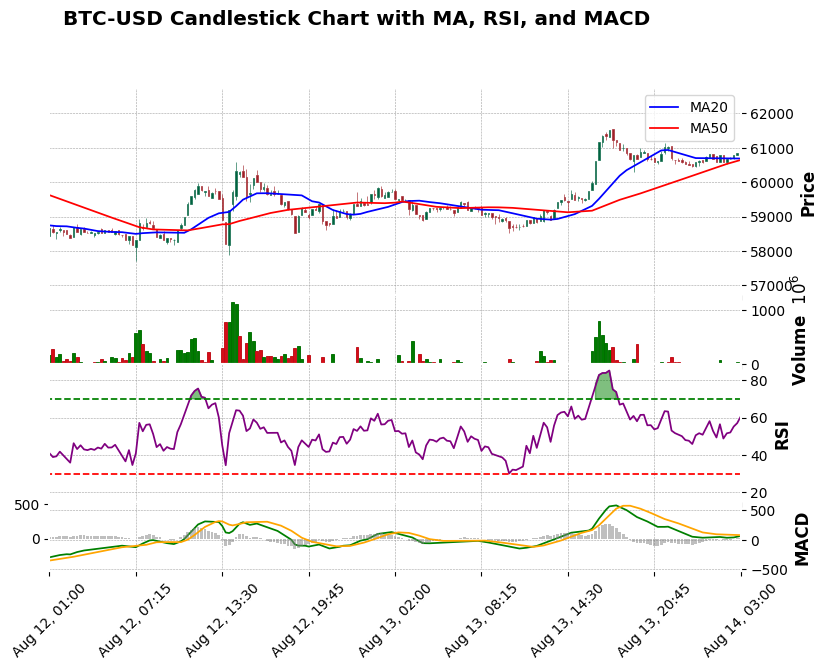

In [41]:
xlim = (df.index[100], df.index[300])
ylim = (df['Low'].min()-1000, df['High'].max()+1000)

# Create subplots for the Moving Averages, RSI, MACD, and Volume
add_plots = [
    mpf.make_addplot(df['MA20'], color='blue', label='MA20'),
    mpf.make_addplot(df['MA50'], color='red', label='MA50'),
    mpf.make_addplot(df['RSI'], panel=2, color='purple', ylabel='RSI'),
    mpf.make_addplot(line30, panel=2, color='r', linestyle='--'),
    mpf.make_addplot(line70, panel=2, color='g', linestyle='--'),
    mpf.make_addplot(df['MACD'], panel=3, color='green', ylabel='MACD'),
    mpf.make_addplot(df['MACD_Signal'], panel=3, color='orange'),
    mpf.make_addplot(df['MACD_Hist'], panel=3, type='bar', color='gray', alpha=0.5),
]

mpf.plot(df, type='candle', style='charles', addplot=add_plots,
         title='BTC-USD Candlestick Chart with MA, RSI, and MACD',
         volume=True,
         panel_ratios=(3, 1, 2, 1),  # Ratio for main chart, RSI, MACD
         figscale=1.2,  # Scale the whole figure to make it more readable
         hlines=dict(hlines=ylim[0], colors='green', linestyle='-'),
         fill_between=dict(y1=70, y2=df['RSI'], where=(df['RSI'] > 70), color='green', alpha=0.5, panel=2),
         ylabel='Price',
         xlim=xlim, ylim=ylim)

